In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

In [2]:
df = pd.read_csv('document_results.csv')

In [3]:
def filter_df(df, models=None, datasets=None):
    if models is not None:
        df = df[df.model_name.isin(models)].reset_index()
    if datasets is not None:
        df = df[df.dataset_name.isin(datasets)].reset_index()
    return df

model_set = {
    'CNN glove',
    'CNN 37d',
    'MLP 1x360',
#     'MLP 2x180',
#     'MLP 3x512',
    'MNB',
#     'MNB bi',
#     'MNB tfidf',
#     'MNB tfidf bi',
#     'MNB tfidf tri',
#     'SVM',
#     'SVM bi',
    'SVM tfidf',
    'SVM tfidf 2-gr'
}

basic_datasets = {
    '20ng-all-terms.txt',
#     '20ng-no-short.txt',
#     '20ng-no-stop.txt',
#     '20ng-stemmed.txt',
    'r52-all-terms.txt',
#     'r52-no-short.txt',
#     'r52-no-stop.txt',
#     'r52-stemmed.txt',
    'r8-all-terms.txt',
#     'r8-no-short.txt',
#     'r8-no-stop.txt',
#     'r8-stemmed.txt',
    'webkb-stemmed.txt'
}

df1_small = filter_df(df, model_set, basic_datasets)

In [25]:
def make_pretty(dataframe, savedir=None):
    dataset_list = list(set(dataframe.dataset_name))
    models_ranked = list(dataframe.groupby('model_name').mean().sort_values('accuracy', ascending=False).reset_index().model_name)

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(13,5))

    sns.stripplot(x='dataset_name', y='accuracy', hue='model_name', jitter=True, data=dataframe, edgecolor='white', ax=ax)
    plt.legend(loc='lower right')
    if savedir is not None:
        plt.savefig(savedir + "/accuracy_stripplot.png")
    plt.show()

    
    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(13,5))

    sns.stripplot(x='dataset_name', y='time', hue='model_name', jitter=True, data=dataframe, edgecolor='white', ax=ax)
    if savedir is not None:
        plt.savefig(savedir + "/time_stripplot.png")
        
    plt.show()

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(13,5))
    sns.barplot(x='dataset_name', y='accuracy', hue='model_name', data=dataframe, ax=ax, hue_order=models_ranked)
    if savedir is not None:
        plt.savefig(savedir + "/time_stripplot.png")
        
    plt.show()

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(12,6))
    sns.boxplot(x='dataset_name', y='accuracy', hue='model_name', data=dataframe, ax=ax)
    if savedir is not None:
        plt.savefig(savedir + "/accuracy_boxplot.png")
    plt.show()

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(12,6))
    sns.barplot(x='dataset_name', y='time', hue='model_name', data=dataframe, ax=ax, hue_order=models_ranked)
    if savedir is not None:
        plt.savefig(savedir + "/accuracy_barplot.png")
    plt.show()

    means = dataframe.groupby(['dataset_name', 'model_name']).mean().reset_index()
    model_data_2_score = {(m, d): acc for m, d, acc in zip(means.model_name, means.dataset_name, means.accuracy)}
    model_data_2_time = {(m, d): acc for m, d, acc in zip(means.model_name, means.dataset_name, means.time)}

    table = [([m] + [model_data_2_score[(m, d)] for d in dataset_list]) for m in models_ranked]
    print tabulate(table, headers=(['model'] + dataset_list), floatfmt='.3f')


    print 
    table = [([m] + [model_data_2_time[(m, d)] for d in dataset_list]) for m in models_ranked]
    print tabulate(table, headers=(['model'] + dataset_list), floatfmt='.3f')


In [28]:
mkdir -p doc_some_models_plots

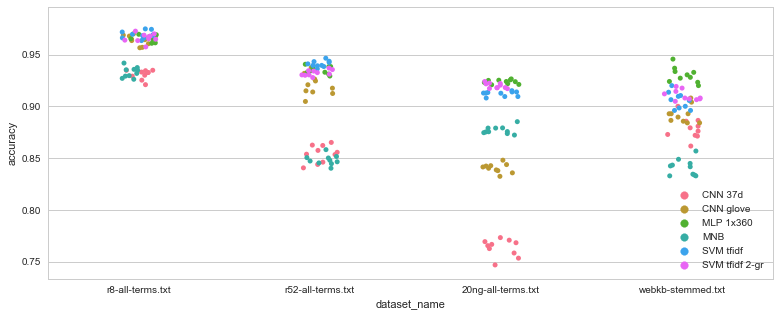

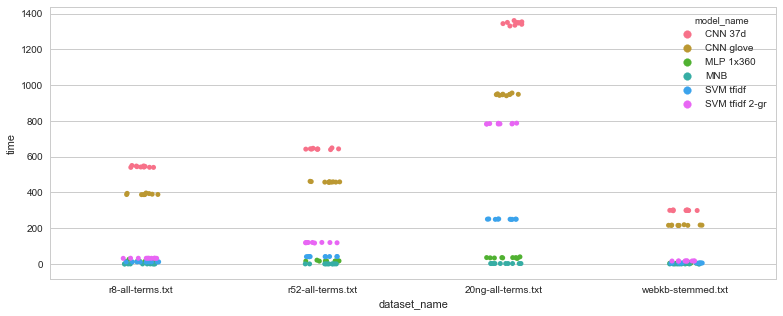

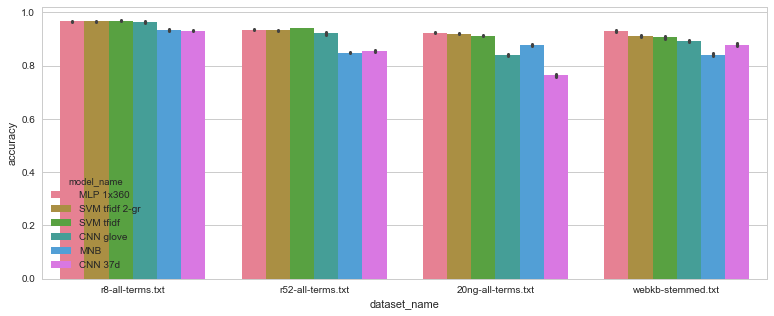

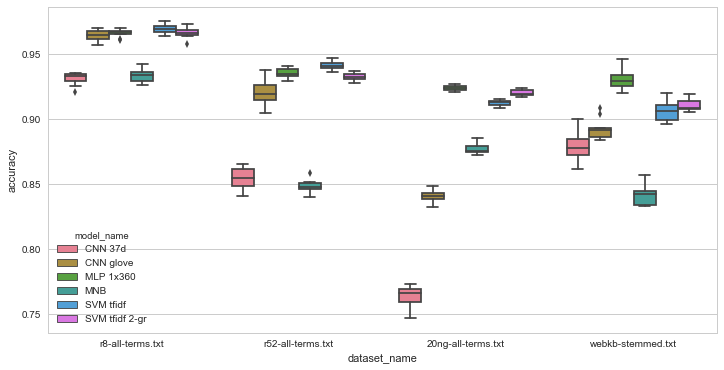

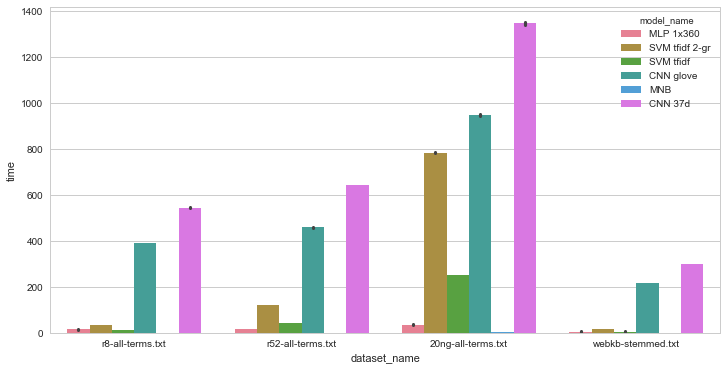

model             r8-all-terms.txt    r52-all-terms.txt    20ng-all-terms.txt    webkb-stemmed.txt
--------------  ------------------  -------------------  --------------------  -------------------
MLP 1x360                    0.966                0.935                 0.924                0.930
SVM tfidf 2-gr               0.966                0.932                 0.920                0.911
SVM tfidf                    0.969                0.941                 0.912                0.906
CNN glove                    0.964                0.920                 0.840                0.892
MNB                          0.933                0.848                 0.877                0.841
CNN 37d                      0.931                0.854                 0.764                0.879

model             r8-all-terms.txt    r52-all-terms.txt    20ng-all-terms.txt    webkb-stemmed.txt
--------------  ------------------  -------------------  --------------------  -------------------
MLP 1x360

In [29]:
make_pretty(df1_small, "doc_some_models_plots")

In [ ]:
mkdir -p doc_all_models_plots

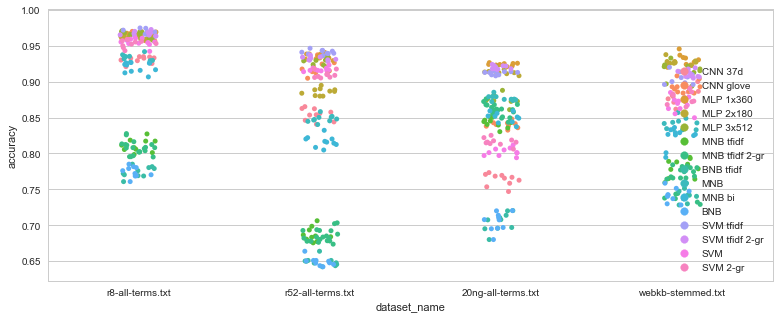

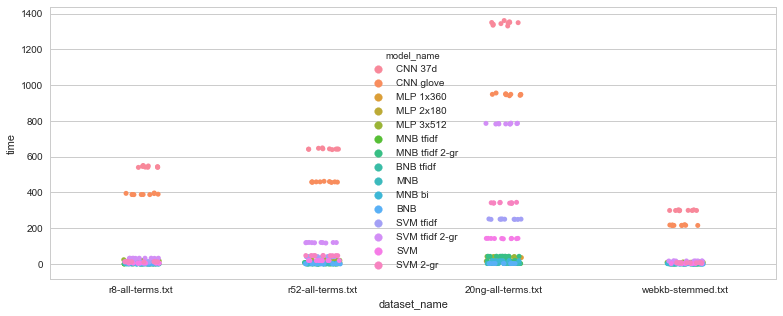

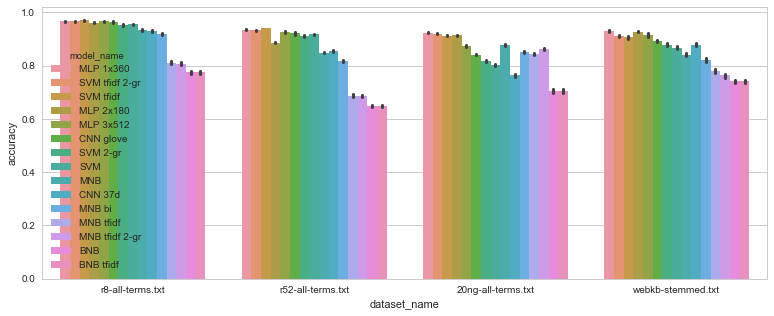

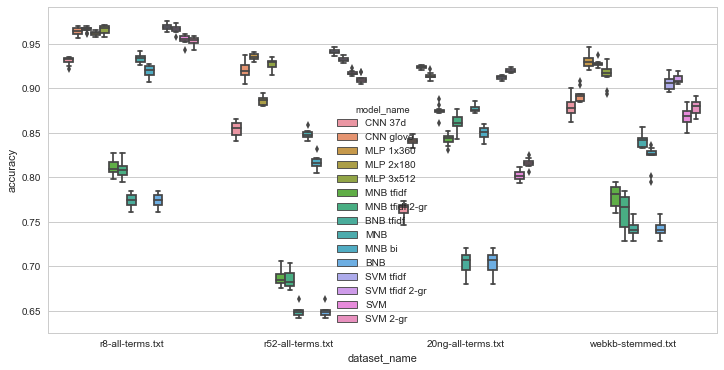

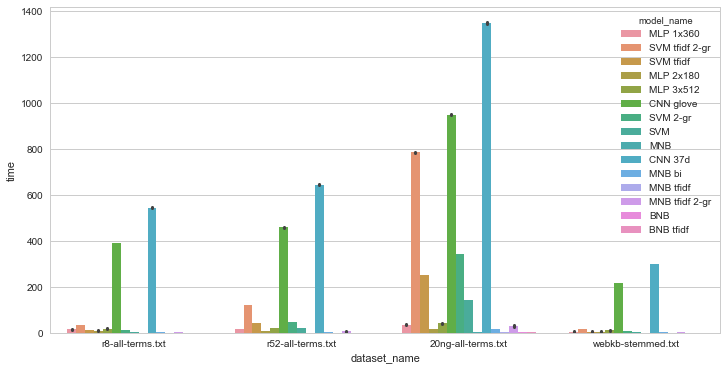

model             r8-all-terms.txt    r52-all-terms.txt    20ng-all-terms.txt    webkb-stemmed.txt
--------------  ------------------  -------------------  --------------------  -------------------
MLP 1x360                    0.966                0.935                 0.924                0.930
SVM tfidf 2-gr               0.966                0.932                 0.920                0.911
SVM tfidf                    0.969                0.941                 0.912                0.906
MLP 2x180                    0.961                0.886                 0.914                0.927
MLP 3x512                    0.966                0.927                 0.875                0.915
CNN glove                    0.964                0.920                 0.840                0.892
SVM 2-gr                     0.953                0.910                 0.816                0.879
SVM                          0.955                0.917                 0.802                0.868
MNB       

In [7]:
df1_all_models = filter_df(df, datasets=basic_datasets)
make_pretty(df1_all_models, "doc_all_models_plots")

In [30]:
df_sent = pd.read_csv("sentence_results.csv")

In [31]:
mkdir -p sentence_all_plots

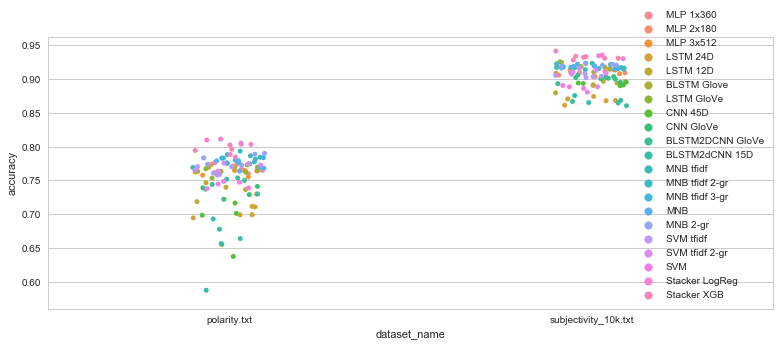

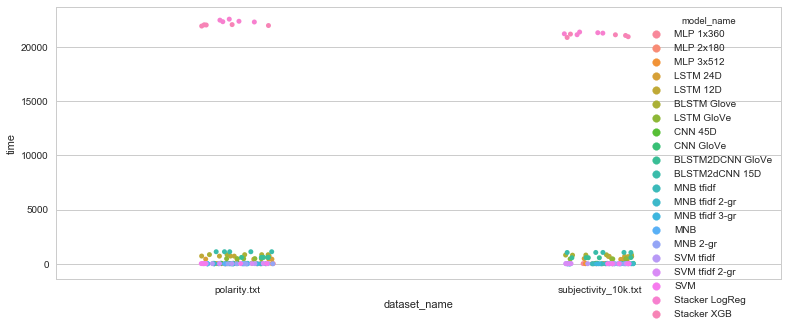

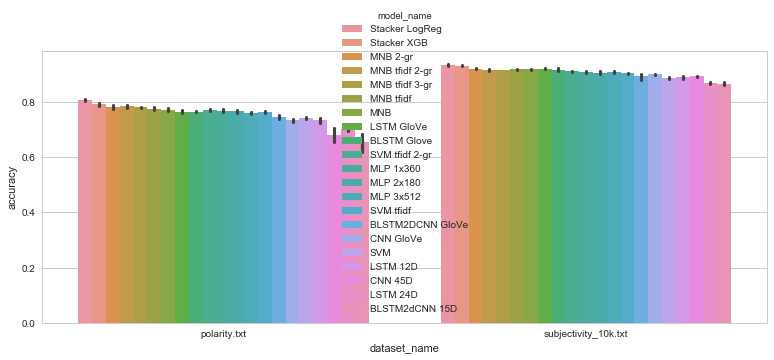

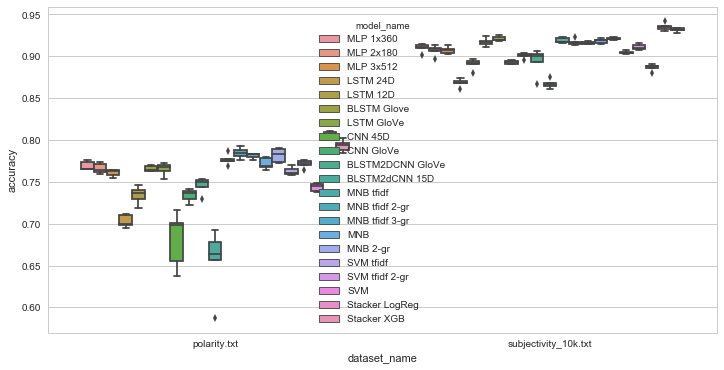

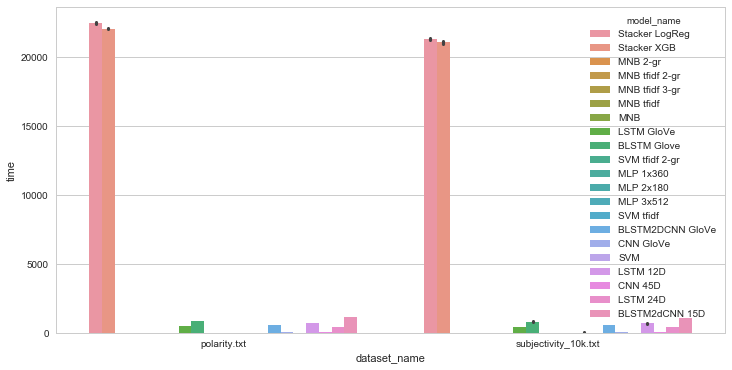

model               subjectivity_10k.txt    polarity.txt
----------------  ----------------------  --------------
Stacker LogReg                     0.935           0.807
Stacker XGB                        0.932           0.793
MNB 2-gr                           0.921           0.782
MNB tfidf 2-gr                     0.917           0.785
MNB tfidf 3-gr                     0.916           0.781
MNB tfidf                          0.919           0.777
MNB                                0.918           0.772
LSTM GloVe                         0.921           0.765
BLSTM Glove                        0.917           0.766
SVM tfidf 2-gr                     0.911           0.772
MLP 1x360                          0.910           0.769
MLP 2x180                          0.907           0.766
MLP 3x512                          0.907           0.761
SVM tfidf                          0.905           0.763
BLSTM2DCNN GloVe                   0.894           0.746
CNN GloVe                      

In [32]:
make_pretty(df_sent, "sentence_all_plots")

In [33]:
mkdir -p sentence_some_models_plots

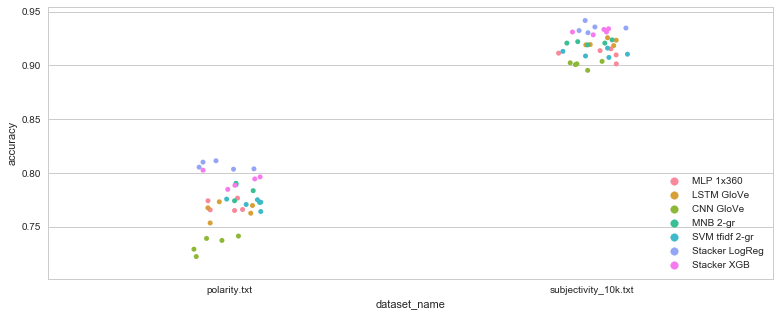

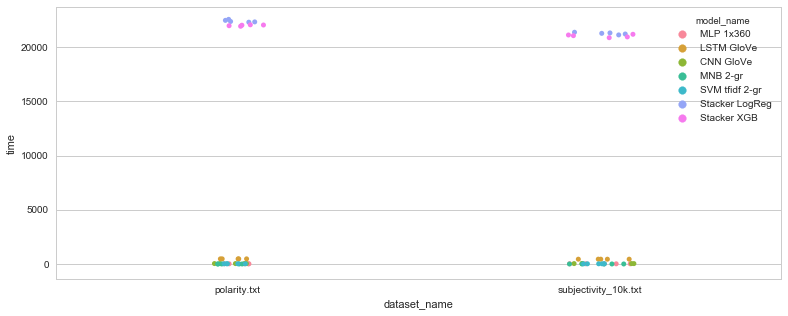

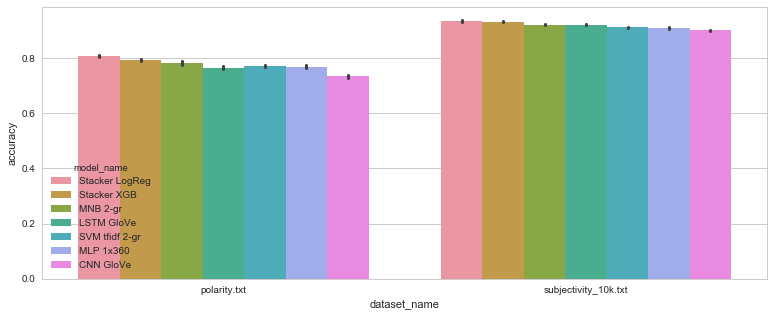

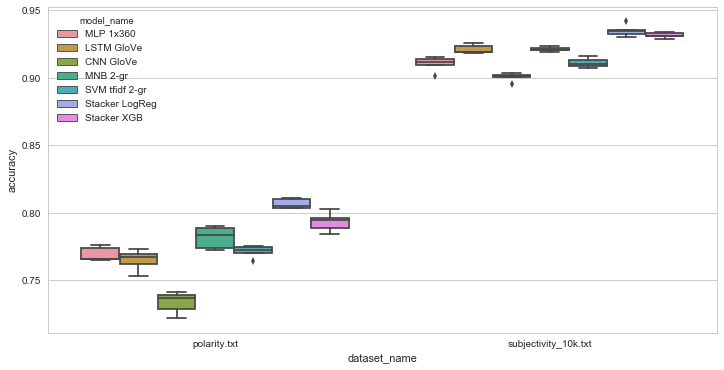

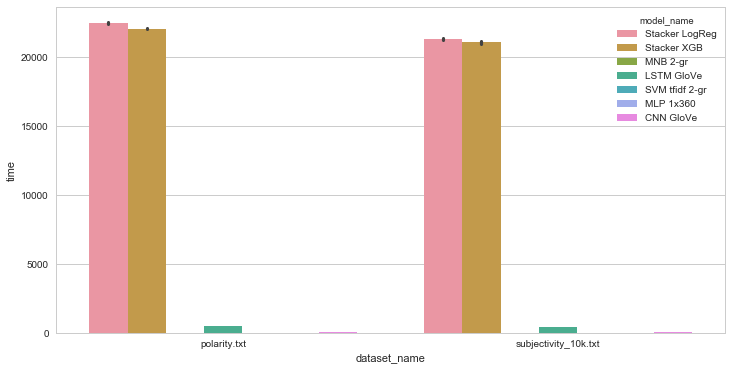

model             subjectivity_10k.txt    polarity.txt
--------------  ----------------------  --------------
Stacker LogReg                   0.935           0.807
Stacker XGB                      0.932           0.793
MNB 2-gr                         0.921           0.782
LSTM GloVe                       0.921           0.765
SVM tfidf 2-gr                   0.911           0.772
MLP 1x360                        0.910           0.769
CNN GloVe                        0.901           0.734

model             subjectivity_10k.txt    polarity.txt
--------------  ----------------------  --------------
Stacker LogReg               21267.355       22414.514
Stacker XGB                  21043.598       22013.446
MNB 2-gr                         0.814           0.749
LSTM GloVe                     442.717         470.227
SVM tfidf 2-gr                  17.218          20.724
MLP 1x360                       16.860          16.511
CNN GloVe                       35.713          37.586


In [34]:
sent_filtered_df = filter_df(df_sent, models=['Stacker LogReg', 'Stacker XGB', "MNB 2-gr", "LSTM GloVe", "SVM tfidf 2-gr", "MLP 1x360", "CNN GloVe"])
make_pretty(sent_filtered_df, "sentence_some_models_plots")